In [2]:
#Import TF
import tensorflow as tf
import random
print(tf.__version__)

2.4.1


In [25]:
#LOAD IMAGES AND LABELS

#import files
##need to first prep filerename with corresponding label

#set directory
import os
import numpy as np
import random as rn

np.random.seed(101)
rn.seed(101)

os.chdir("C:\\Users\mark.fowler\OneDrive - LSTM\LSTM\Machine Learning\PPF Ovaries\London School data\Class - Fertility")
train_path = "./Train/"  #use working directory + ./Train/ as train_path
print(os.getcwd())

#load all images and their labels
##get name of all files in the working directory - use name for labels (fer + inf)
image_files = os.listdir(train_path)


##use the open cv library for function load these images as a pixel array
import cv2
def load_image(file_path):
    return cv2.imread(file_path)


train_images = []
train_images_small = []
for file in image_files:
    img = load_image(train_path + file)
    train_images.append(img)
    train_images_small.append(img)


##function to extract label of image from file name
def extract_label(file_name):
    return 1 if "fer" in file_name else 0

train_labels = [extract_label(file) for file in image_files]
train_labels_orig  = [extract_label(file) for file in image_files]

C:\Users\mark.fowler\OneDrive - LSTM\LSTM\Machine Learning\PPF Ovaries\London School data\Class - Fertility


In [26]:
#resize images in case to big for RAM
train_images_orig = train_images
train_images_orig2 = train_images_small

def img_prep(img, side = 224):
    img = cv2.resize(img, (side,side)) 
    return img 

for i in range(len(train_labels)):
    train_images[i] = img_prep(train_images_orig[i])
   
for i in range(len(train_labels_orig)):
    train_images_small[i] = img_prep(train_images_orig2[i])
   
    
print(len(train_images))
print(len(train_images_small))


367
367


In [27]:
#Data augmentation
## add online (i.e not saved) image variations to train dataset
## geometric transformation - random rotate
import imgaug as ia
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from numpy import expand_dims
from matplotlib import pyplot
np.random.seed(123)
rn.seed(123)
tf.compat.v1.set_random_seed(123)


print(len(train_images))
print(len(train_images_small))


#define random rotation function
##https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=360,
        horizontal_flip = True,
        vertical_flip=True,        
        brightness_range= [0.7, 1.3],
        fill_mode="constant"
        #'wrap' fills black space with repeated image
        #'constant' leaves blank space
)


#FOR loop to add x random rotations of each train immage
for x in range(len(train_labels)):
    img_rot = train_images[x]
    data = img_to_array(img_rot)
    samples = expand_dims(data, 0)
    it = datagen.flow(samples, batch_size=1)

    for y in range(18):
        # generate batch of images
        batch = it.next()
        # attach to train set
        train_images.append(batch[0].astype('uint8'))
        train_labels.append(train_labels[x])


print(len(train_images))
print(len(train_images_small))

367
367
6973
367


In [28]:
#inspect example 
from matplotlib import pyplot as plt
plt.axis('off')
plt.imshow(train_images[7])

(<matplotlib.image.AxesImage at 0x1e229c828b0>,
 <matplotlib.image.AxesImage at 0x1e228c5e2e0>)

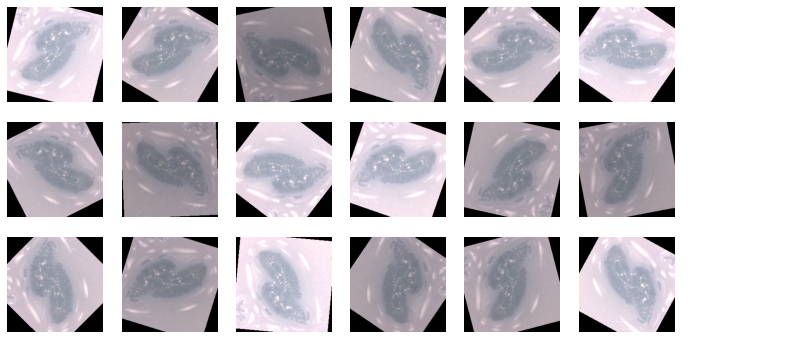

In [29]:
#inspect augmentations
f,axarr = plt.subplots(3,7, figsize=(14, 6))
for y in range(3):
    for x in range(7):
        axarr[y,x].axis('off')
axarr[0,0].imshow(train_images[440]), axarr[0,1].imshow(train_images[441]), axarr[0,2].imshow(train_images[442]), axarr[0,3].imshow(train_images[443]), axarr[0,4].imshow(train_images[444]), axarr[0,5].imshow(train_images[445])
axarr[1,0].imshow(train_images[446]), axarr[1,1].imshow(train_images[447]), axarr[1,2].imshow(train_images[448]), axarr[1,3].imshow(train_images[449]), axarr[1,4].imshow(train_images[450]), axarr[1,5].imshow(train_images[451])
axarr[2,0].imshow(train_images[452]), axarr[2,1].imshow(train_images[453]), axarr[2,2].imshow(train_images[454]), axarr[2,3].imshow(train_images[455]), axarr[2,4].imshow(train_images[456]), axarr[2,5].imshow(train_images[439])

In [ ]:
#CNN MANUAL BUILD For COMPARISON 

In [30]:

#MANUAL BUILD 1
#prep data for bw handmade cnn
#2 train sets (1 with, 1 without data aug) + 1 test set
def preprocess_image(img, side = 224):
    #min_side = min(img.shape[0], img.shape[1]) #crop to smallests side if needed
    #img = img[:min_side, :min_side] #crop no2
    img = cv2.resize(img, (side,side)) #resize to "side" piuxel length - tweak
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # greyscale
    return img / 2555.0


##TRAIN
#trainset without data augmentation
orig_images = []
for i in range(len(train_labels_orig )):
    orig_images.append(preprocess_image(train_images_small [i]))

#trainset with data augmentation
aug_images = []
for i in range(len(train_labels)):
    aug_images.append(preprocess_image(train_images[i]))


##TEST
np.random.seed(101)
rn.seed(101)
tf.compat.v1.set_random_seed(101)
##load and preprocess test images
test_path = "./Test/"  #use working directory + ./Train/ as train_path
image_files_test = os.listdir(test_path)

test_labels = [extract_label(file) for file in image_files_test]

test_images = []
for file in image_files_test:
    img = load_image(test_path + file)
    test_images.append(img)
    

    
pro_testimages = []
for i in range(len(test_labels)):
    pro_testimages.append(preprocess_image(test_images[i]))
    

    
#define shape for input of cnn    
InputShape = np.expand_dims(aug_images, axis = -1) #have to add number of channels 
InputShape = InputShape.shape[1:]



In [46]:
InputShape

(224, 224, 1)

In [31]:
##MANUAL BUILD 2:  DEFINE THE NEURAL NETWORK ARCHITECTURE
np.random.seed(101)
rn.seed(101)
tf.compat.v1.set_random_seed(101)
##use keras to create sequential model that takes in sequence of layers that transform input
## in to classifications predictions



layers = [
    #input ('input_shap') hidden layer
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding="same",activation=tf.nn.relu, input_shape=InputShape),
    #pooling layer - 2,2 strides halves input for pool
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    
    #2nd hidden layer
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same",activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    
    
    #3rd hidden layer
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same",activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    
    #4th hidden layer
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same",activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    
    tf.keras.layers.Flatten(),
    #output layer - 2 nodes (normal / affected)
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
]


model = tf.keras.Sequential(layers)
model.compile(optimizer = tf.optimizers.RMSprop(),
             loss=tf.losses.SparseCategoricalCrossentropy(),
             metrics=[tf.metrics.BinaryAccuracy()])


model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       7

In [38]:
###MANUAL BUILD 3a:  TRAIN THE MODEL
#WIHTOOUT DATA AUGMENTATION
np.random.seed(101)
rn.seed(101)
tf.compat.v1.set_random_seed(101)
# Too many epochs = overfit; too few = underfit. The Problem of Training Just Enough
## Problem solved with Early Stopping

#Define train set - need to add extra dimension for channel number (only 1 as b/w)
TrainSet = np.expand_dims(orig_images , axis = -1)
train_labels_orig  = np.array(train_labels_orig)

##call model.fit function with training data and labels and no of epochs (one iteration over all of the training data)
model.fit(TrainSet, train_labels_orig , epochs=5, batch_size=32)
#save the weights of models for predict
model.save_weights("model_no_aug.tf")



Epoch 1/5
12/12 [==============================] - 21s 2s/step - loss: 0.2845 - binary_accuracy: 0.5000
Epoch 2/5
12/12 [==============================] - 23s 2s/step - loss: 0.2253 - binary_accuracy: 0.5000
Epoch 3/5
12/12 [==============================] - 23s 2s/step - loss: 0.2116 - binary_accuracy: 0.5000
Epoch 4/5
12/12 [==============================] - 23s 2s/step - loss: 0.1874 - binary_accuracy: 0.5000
Epoch 5/5
12/12 [==============================] - 23s 2s/step - loss: 0.1322 - binary_accuracy: 0.5000


In [39]:
###MANUAL BUILD 3b:  TRAIN THE MODEL
#WITH DATA AUGMENTATION
np.random.seed(101)
rn.seed(101)
tf.compat.v1.set_random_seed(101)
# Too many epochs = overfit; too few = underfit. The Problem of Training Just Enough
## Problem solved with Early Stopping

#Define train set - need to add extra dimension for channel number (only 1 as b/w)
TrainSet = np.expand_dims(aug_images, axis = -1)
train_labels = np.array(train_labels)

##call model.fit function with training data and labels and no of epochs (one iteration over all of the training data)
model.fit(TrainSet, train_labels, epochs=5, batch_size=32)
#save the weights of models for predict
model.save_weights("model_with_aug.tf")



Epoch 1/5
218/218 [==============================] - 419s 2s/step - loss: 0.2752 - binary_accuracy: 0.5000
Epoch 2/5
218/218 [==============================] - 420s 2s/step - loss: 0.2417 - binary_accuracy: 0.5000
Epoch 3/5
218/218 [==============================] - 421s 2s/step - loss: 0.2132 - binary_accuracy: 0.5000
Epoch 4/5
218/218 [==============================] - 420s 2s/step - loss: 0.1863 - binary_accuracy: 0.5000
Epoch 5/5
218/218 [==============================] - 6089s 28s/step - loss: 0.1628 - binary_accuracy: 0.5000


In [44]:
##MANUAL BUILD 4a:  TEST THE MODEL'S ACCURACY AGAINST TEST SET
#WITHOUT DATA AUGMENTATION

#create new model with saved weights
test_model = tf.keras.Sequential(layers)
test_model.load_weights("model_no_aug.tf")
#get prediction probabilities (inc. code to expand dimensions to fit into algorithm)
test_predictions = test_model.predict(np.expand_dims(pro_testimages, axis = -1))



#measure accuracy using scikitlearn's confusion matrix
pred = []
for i in range(len(test_predictions)):
    pred.append(np.argmax(test_predictions[i]))

    
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
print("conf matrix", confusion_matrix(test_labels, pred))
print()
print("Report",classification_report(test_labels, pred))
print()


print('acc:', round(accuracy_score(test_labels, pred),3))

print('recall_0:', round(recall_score(test_labels, pred, average="binary", pos_label=0),3))
print('recall_1:', round(recall_score(test_labels, pred, average="binary", pos_label=1),3))

print('precision_0:', round(precision_score(test_labels, pred, average="binary", pos_label=0),3))
print('precision_1:', round(precision_score(test_labels, pred, average="binary", pos_label=1),3))



conf matrix [[77  4]
 [31 45]]

Report               precision    recall  f1-score   support

           0       0.71      0.95      0.81        81
           1       0.92      0.59      0.72        76

    accuracy                           0.78       157
   macro avg       0.82      0.77      0.77       157
weighted avg       0.81      0.78      0.77       157


acc: 0.777
recall_0: 0.951
recall_1: 0.592
precision_0: 0.713
precision_1: 0.918


In [45]:
##MANUAL BUILD 4b:  TEST THE MODEL'S ACCURACY AGAINST TEST SET
#WITH DATA AUGMENTATION

#create new model with saved weights
test_model = tf.keras.Sequential(layers)
test_model.load_weights("model_with_aug.tf")
#get prediction probabilities (inc. code to expand dimensions to fit into algorithm)
test_predictions = test_model.predict(np.expand_dims(pro_testimages, axis = -1))



#measure accuracy using scikitlearn's confusion matrix
pred = []
for i in range(len(test_predictions)):
    pred.append(np.argmax(test_predictions[i]))

    
print("conf matrix", confusion_matrix(test_labels, pred))
print()
print("Report",classification_report(test_labels, pred))
print()


print('acc:', round(accuracy_score(test_labels, pred),3))

print('recall_0:', round(recall_score(test_labels, pred, average="binary", pos_label=0),3))
print('recall_1:', round(recall_score(test_labels, pred, average="binary", pos_label=1),3))

print('precision_0:', round(precision_score(test_labels, pred, average="binary", pos_label=0),3))
print('precision_1:', round(precision_score(test_labels, pred, average="binary", pos_label=1),3))


conf matrix [[73  8]
 [21 55]]

Report               precision    recall  f1-score   support

           0       0.78      0.90      0.83        81
           1       0.87      0.72      0.79        76

    accuracy                           0.82       157
   macro avg       0.82      0.81      0.81       157
weighted avg       0.82      0.82      0.81       157


acc: 0.815
recall_0: 0.901
recall_1: 0.724
precision_0: 0.777
precision_1: 0.873


In [ ]:
#TRANSFER LEARNING
## if a model is trained on a large and general enough dataset, this model will serve as a generic model of the visual world. 
## You can then take advantage of these learned feature maps without having to start from scratch by training a large model on a large dataset.
### https://keras.io/api/applications/

In [11]:
#### VGG16 (224x224,3)
np.random.seed(123)
rn.seed(123)
tf.compat.v1.set_random_seed(123)
from tensorflow.keras import applications
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model

#prep data
def vgg_prep(img, side = 224):
    img = cv2.resize(img, (side,side)) 
    return img
##train
vgg_train = []
for i in range(len(train_labels)):
    vgg_train.append(vgg_prep(train_images[i])) 
vgg_train = np.array(vgg_train)
train_labels = np.array(train_labels)
##test
vgg_test = []
test_path = "./Test/"  #use working directory + ./Train/ as train_path
image_files_test = os.listdir(test_path)
test_labels = [extract_label(file) for file in image_files_test]
test_images = []
for file in image_files_test:
    img = load_image(test_path + file)
    test_images.append(img)
for i in range(len(test_labels)):
    vgg_test.append(vgg_prep(test_images[i]))
vgg_test = np.array(vgg_test)
    
# add preprocessing layer to the front of VGG
IMAGE_SIZE = [224, 224]
vgg = applications.VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

#specify output layer
x = Flatten()(vgg.layers[-1].output)
prediction = Dense(2, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
#model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss=tf.losses.SparseCategoricalCrossentropy(),
  optimizer='adam',
  metrics=['BinaryAccuracy']
)


# fit the model
r = model.fit(vgg_train, train_labels, epochs=5, batch_size=32)
#create new model with saved weights
model.save_weights("vgg_model.tf")
model.save('vgg_model')
model.save('vgg_model.h5')


#TEST
test_model = Model(inputs=model.input, outputs=prediction)
test_model.load_weights("vgg_model.tf")

#get prediction probabilities (inc. code to expand dimensions to fit into algorithm)
test_imgs = np.array(vgg_test)
test_predictions = test_model.predict(test_imgs)

 

#measure accuracy using scikitlearn's confusion matrix
pred = []
for i in range(len(test_predictions)):
    pred.append(np.argmax(test_predictions[i]))

    
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score
print("conf matrix /n", confusion_matrix(test_labels, pred))


print('acc:',round(accuracy_score(test_labels, pred),3))
print('recall0',round(recall_score(test_labels, pred, average="binary", pos_label=0),3))
print('recall1',round(recall_score(test_labels, pred, average="binary", pos_label=1),3))
print('f10:',round(f1_score(test_labels, pred, average="binary", pos_label=0),3))
print('f11:',round(f1_score(test_labels, pred, average="binary", pos_label=1),3))



Epoch 1/5
218/218 [==============================] - 606s 3s/step - loss: 4.1060 - binary_accuracy: 0.5000
Epoch 2/5
218/218 [==============================] - 606s 3s/step - loss: 0.5480 - binary_accuracy: 0.5000
Epoch 3/5
218/218 [==============================] - 603s 3s/step - loss: 0.2979 - binary_accuracy: 0.5000
Epoch 4/5
218/218 [==============================] - 1232s 6s/step - loss: 0.1399 - binary_accuracy: 0.5000
Epoch 5/5
218/218 [==============================] - 603s 3s/step - loss: 0.2356 - binary_accuracy: 0.5000
INFO:tensorflow:Assets written to: vgg_model\assets
conf matrix /n [[73  8]
 [10 66]]
acc: 0.885
recall0 0.901
recall1 0.868
f10: 0.89
f11: 0.88


In [12]:
from sklearn import metrics
np.random.seed(101)
rn.seed(101)
tf.compat.v1.set_random_seed(101)
# ROC curve: common with binary classifiers - comp of true positive against false positive
# true negatives (FPR) = specificity / true positives (TPR) = sensitivity
# AUC = Area Under the Curve

#nn
nn_pred = test_predictions[0:157, 1] 
nn_fpr, nn_tpr, nn_thresholds = metrics.roc_curve(test_labels, nn_pred, pos_label=1)
nn_auc = metrics.auc(nn_fpr, nn_tpr)

plt.figure(figsize=(5,5), dpi=100)
plt.plot(nn_fpr, nn_tpr, linestyle='-', label='NN AUC %0.3f' % nn_auc)
plt.xlabel('FPR RATE (SPECIFICITY)')
plt.ylabel('TPR RATE (SENSITIVITY)')
plt.legend()
plt.show()

In [9]:
#investigate predictions
for i in range(len(test_predictions)):
    print(np.argmax(test_predictions[i]))

In [7]:
#### Resnet50 (224x224,3)
np.random.seed(123)
rn.seed(123)
tf.compat.v1.set_random_seed(123)
from tensorflow.keras import applications
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model

#prep data
def res_prep(img, side = 224):
    img = cv2.resize(img, (side,side)) 
    return img 
##train
Res50_train = []
for i in range(len(train_labels)):
    Res50_train.append(res_prep(train_images[i])) 
Res50_train = np.array(Res50_train)
train_labels = np.array(train_labels)
##test
Res50_test = []
test_path = "./Test/"  #use working directory + ./Train/ as train_path
image_files_test = os.listdir(test_path)
test_labels = [extract_label(file) for file in image_files_test]
test_images = []
for file in image_files_test:
    img = load_image(test_path + file)
    test_images.append(img)
for i in range(len(test_labels)):
    Res50_test.append(res_prep(test_images[i]))
Res50_test = np.array(Res50_test)
    
# add preprocessing layer to the front of model
IMAGE_SIZE = [224, 224]
ResNet50 = applications.ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in ResNet50.layers:
  layer.trainable = False

#specify output layer
x = Flatten()(ResNet50.layers[-1].output)
prediction = Dense(2, activation='softmax')(x)

# create a model object
model = Model(inputs=ResNet50.input, outputs=prediction)

# view the structure of the model
#model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss=tf.losses.SparseCategoricalCrossentropy(),
  optimizer='adam',
  metrics=['BinaryAccuracy']
)


# fit the model
r = model.fit(Res50_train, train_labels, epochs=5, batch_size=32)
#create new model with saved weights
model.save_weights("Res50_model_32.tf")
model.save_weights("Res50_model_32")
model.save('Res50_model_32')
model.save('Res50_model_32.h5')

#TEST
test_model = Model(inputs=model.input, outputs=prediction)
test_model.load_weights("Res50_model_32.tf")

#get prediction probabilities (inc. code to expand dimensions to fit into algorithm)
test_imgs = np.array(Res50_test)
test_predictions = test_model.predict(test_imgs)

 

#measure accuracy using scikitlearn's confusion matrix
pred = []
for i in range(len(test_predictions)):
    pred.append(np.argmax(test_predictions[i]))

    

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score
print("conf matrix /n", confusion_matrix(test_labels, pred))

print('acc:',round(accuracy_score(test_labels, pred),3))
print('recall0',round(recall_score(test_labels, pred, average="binary", pos_label=0),3))
print('recall1',round(recall_score(test_labels, pred, average="binary", pos_label=1),3))
print('f10:',round(f1_score(test_labels, pred, average="binary", pos_label=0),3))
print('f11:',round(f1_score(test_labels, pred, average="binary", pos_label=1),3))

Epoch 1/5
218/218 [==============================] - 344s 2s/step - loss: 3.4745 - binary_accuracy: 0.5000
Epoch 2/5
218/218 [==============================] - 337s 2s/step - loss: 0.5871 - binary_accuracy: 0.5000
Epoch 3/5
218/218 [==============================] - 337s 2s/step - loss: 0.1382 - binary_accuracy: 0.5000
Epoch 4/5
218/218 [==============================] - 343s 2s/step - loss: 0.2712 - binary_accuracy: 0.5000
Epoch 5/5
218/218 [==============================] - 343s 2s/step - loss: 0.1433 - binary_accuracy: 0.5000
INFO:tensorflow:Assets written to: Res50_model_32\assets
conf matrix /n [[77  4]
 [ 5 71]]
acc: 0.943
recall0 0.951
recall1 0.934
f10: 0.945
f11: 0.94


In [8]:
print('acc:',round(accuracy_score(test_labels, pred),3))

acc: 0.943


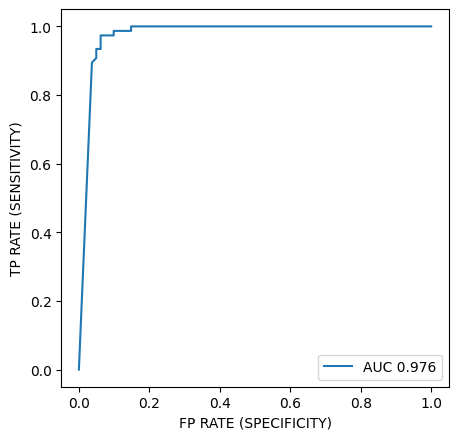

In [14]:
from sklearn import metrics
np.random.seed(101)
rn.seed(101)
tf.compat.v1.set_random_seed(101)
# ROC curve: common with binary classifiers - comp of true positive against false positive
# true negatives (FPR) = specificity / true positives (TPR) = sensitivity
# AUC = Area Under the Curve

#nn
nn_pred = test_predictions[0:157, 1] 
nn_fpr, nn_tpr, nn_thresholds = metrics.roc_curve(test_labels, nn_pred, pos_label=1)
nn_auc = metrics.auc(nn_fpr, nn_tpr)

plt.figure(figsize=(5,5), dpi=100)
plt.plot(nn_fpr, nn_tpr, linestyle='-', label='AUC %0.3f' % nn_auc)
plt.xlabel('FP RATE (SPECIFICITY)')
plt.ylabel('TP RATE (SENSITIVITY)')
plt.legend()
plt.show()

In [ ]:
#investigate predictions
for i in range(len(test_predictions)):
    print(image_files_test[i], end='\t')
    print(np.argmax(test_predictions[i]))

In [17]:
#### Inception (229x229,3)
np.random.seed(123)
rn.seed(123)
tf.compat.v1.set_random_seed(123)
from tensorflow.keras import applications
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model

#prep data
def inc_prep(img, side = 229):
    img = cv2.resize(img, (side,side)) 
    return img
##train
Inc_train = []
for i in range(len(train_labels)):
    Inc_train.append(inc_prep(train_images[i])) 
Inc_train = np.array(Inc_train)
train_labels = np.array(train_labels)
##test
Inc_test = []
test_path = "./Test/"  #use working directory + ./Train/ as train_path
image_files_test = os.listdir(test_path)
test_labels = [extract_label(file) for file in image_files_test]
test_images = []
for file in image_files_test:
    img = load_image(test_path + file)
    test_images.append(img)
for i in range(len(test_labels)):
    Inc_test.append(inc_prep(test_images[i]))
Inc_test = np.array(Inc_test)
    
# add preprocessing layer to the front of VGG
IMAGE_SIZE = [229, 229]
Inception = applications.InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in Inception.layers:
  layer.trainable = False

#specify output layer
x = Flatten()(Inception.layers[-1].output)
prediction = Dense(2, activation='softmax')(x)

# create a model object
model = Model(inputs=Inception.input, outputs=prediction)

# view the structure of the model
#model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss=tf.losses.SparseCategoricalCrossentropy(),
  optimizer='adam',
  metrics=['BinaryAccuracy']
)


#calculate class weights
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(train_labels),
                                                 train_labels)
class_weight = {0: class_weights[0],  1: class_weights[1]}


# fit the model
r = model.fit(Inc_train, train_labels, epochs=5, batch_size=32, class_weight=class_weight)
#create new model with saved weights
model.save_weights("Inception_model.tf")
model.save('Inception_model')
model.save('Inception_model.h5')

#TEST
test_model = Model(inputs=model.input, outputs=prediction)
test_model.load_weights("Inception_model.tf")


#get prediction probabilities (inc. code to expand dimensions to fit into algorithm)
test_imgs = np.array(Inc_test)
test_predictions = test_model.predict(test_imgs)

 

#measure accuracy using scikitlearn's confusion matrix
pred = []
for i in range(len(test_predictions)):
    pred.append(np.argmax(test_predictions[i]))

    

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score
print("conf matrix /n", confusion_matrix(test_labels, pred))

print('acc:',round(accuracy_score(test_labels, pred),3))
print('recall0',round(recall_score(test_labels, pred, average="binary", pos_label=0),3))
print('recall1',round(recall_score(test_labels, pred, average="binary", pos_label=1),3))
print('f10:',round(f1_score(test_labels, pred, average="binary", pos_label=0),3))
print('f11:',round(f1_score(test_labels, pred, average="binary", pos_label=1),3))

C:\Users\mark.fowler\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1], y=[1 1 1 ... 0 0 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Epoch 1/5
218/218 [==============================] - 414s 2s/step - loss: 63.5402 - binary_accuracy: 0.5000
Epoch 2/5
218/218 [==============================] - 407s 2s/step - loss: 16.2861 - binary_accuracy: 0.5000
Epoch 3/5
218/218 [==============================] - 407s 2s/step - loss: 10.9885 - binary_accuracy: 0.5000
Epoch 4/5
218/218 [==============================] - 406s 2s/step - loss: 11.3550 - binary_accuracy: 0.5000
Epoch 5/5
218/218 [==============================] - 1899s 9s/step - loss: 16.6144 - binary_accuracy: 0.5000
INFO:tensorflow:Assets written to: Inception_model\assets
conf matrix /n [[58 23]
 [ 8 68]]
acc: 0.803
recall0 0.716
recall1 0.895
f10: 0.789
f11: 0.814


In [ ]:
from sklearn import metrics
np.random.seed(101)
rn.seed(101)
tf.compat.v1.set_random_seed(101)
# ROC curve: common with binary classifiers - comp of true positive against false positive
# true negatives (FPR) = specificity / true positives (TPR) = sensitivity
# AUC = Area Under the Curve

#nn
nn_pred = test_predictions[0:101, 1] 
nn_fpr, nn_tpr, nn_thresholds = metrics.roc_curve(test_labels, nn_pred, pos_label=1)
nn_auc = metrics.auc(nn_fpr, nn_tpr)

plt.figure(figsize=(5,5), dpi=100)
plt.plot(nn_fpr, nn_tpr, linestyle='-', label='NN AUC %0.3f' % nn_auc)
plt.xlabel('FP RATE (SPECIFICITY)')
plt.ylabel('TP RATE (SENSITIVITY)')
plt.legend()
plt.show()